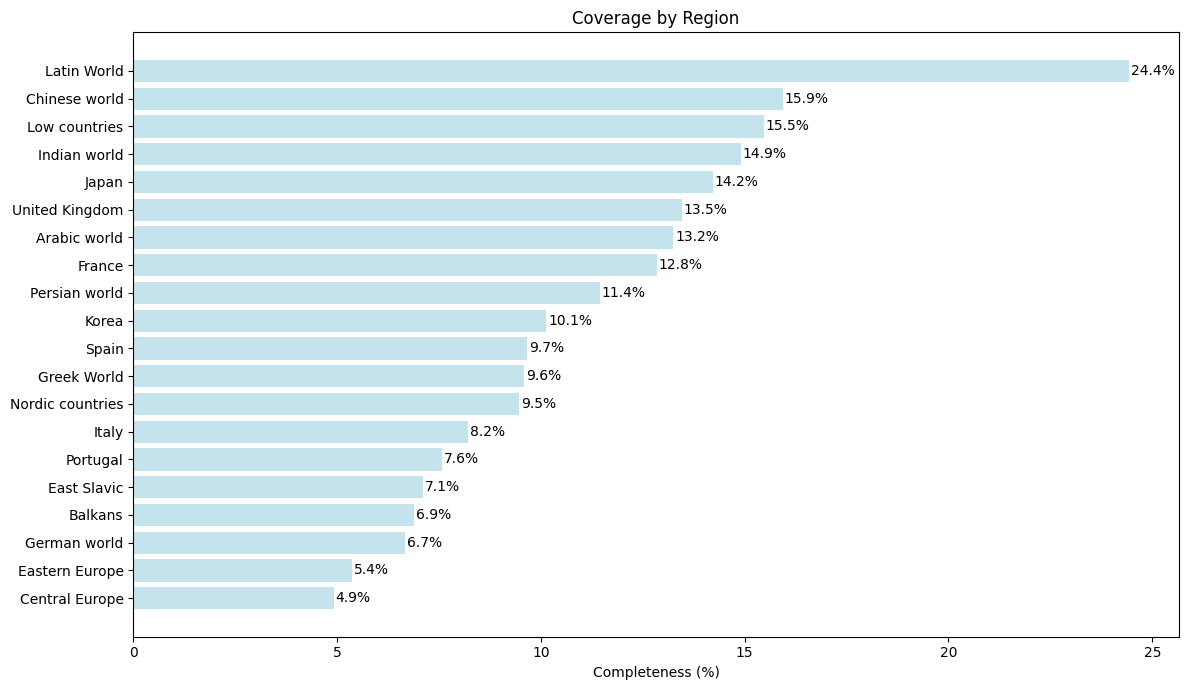

In [23]:
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv('../results/occupation/unseen_data.csv', index_col=0)
data_sorted = data.sort_values(by='count_cps', ascending=False)
data_group = (data_sorted.groupby('region_name')['count_cps'].sum() / data_sorted.groupby('region_name')['N_est'].sum()).rename('coverage').reset_index()
data_group = data_group.sort_values('coverage', ascending=True)

fig, ax = plt.subplots(figsize=(12, 7))
bars = ax.barh(data_group['region_name'], data_group['coverage']*100, color='lightblue', alpha=0.7)

ax.set_xlabel('Completeness (%)')
ax.set_ylabel('')
ax.set_title('Coverage by Region')

# Add values at the end of each bar
for bar in bars:
    width = bar.get_width()
    label = f'{width:.1f}%'
    x_pos = width + 0.05
    y_pos = bar.get_y() + bar.get_height() / 2
    ax.text(x_pos, y_pos, label, ha='left', va='center')
plt.tight_layout()
plt.show()


In [24]:
# Coverage = number of f1/N Alan Turing
# Chao 1984
# Soviet guy for the star
# 3 times i has been re-discovered
# 2007 Turing Chao
# 1956 coverage; gives tge porbability if I find something new it belongs to some class I already Seen, not need the unseen species model
# 5%: I have 5% of change of fingin somethign I arelady know


,N_est,lower,upper,decade,region_name,model_type,count_cps
501,40310.350080,38283.997736,42368.544793,1860,German world,base_model,2768
499,40139.345787,38409.032940,41869.585373,1840,German world,base_model,2738
500,33345.095741,31843.013331,34877.214127,1850,German world,base_model,2283
316,16365.310784,15594.495462,17153.460529,1860,France,base_model,2128
208,32552.107666,30252.655519,34932.682055,1860,Eastern Europe,base_model,1765
...,...,...,...,...,...,...,...
1164,2.490214,2.069722,2.952172,370,Chinese world,base_model,1
1167,2.526148,2.089920,2.998099,400,Chinese world,base_model,1
1169,2.783776,2.309387,3.309199,460,Chinese world,base_model,1
1170,2.850854,2.366693,3.392152,470,Chinese world,base_model,1


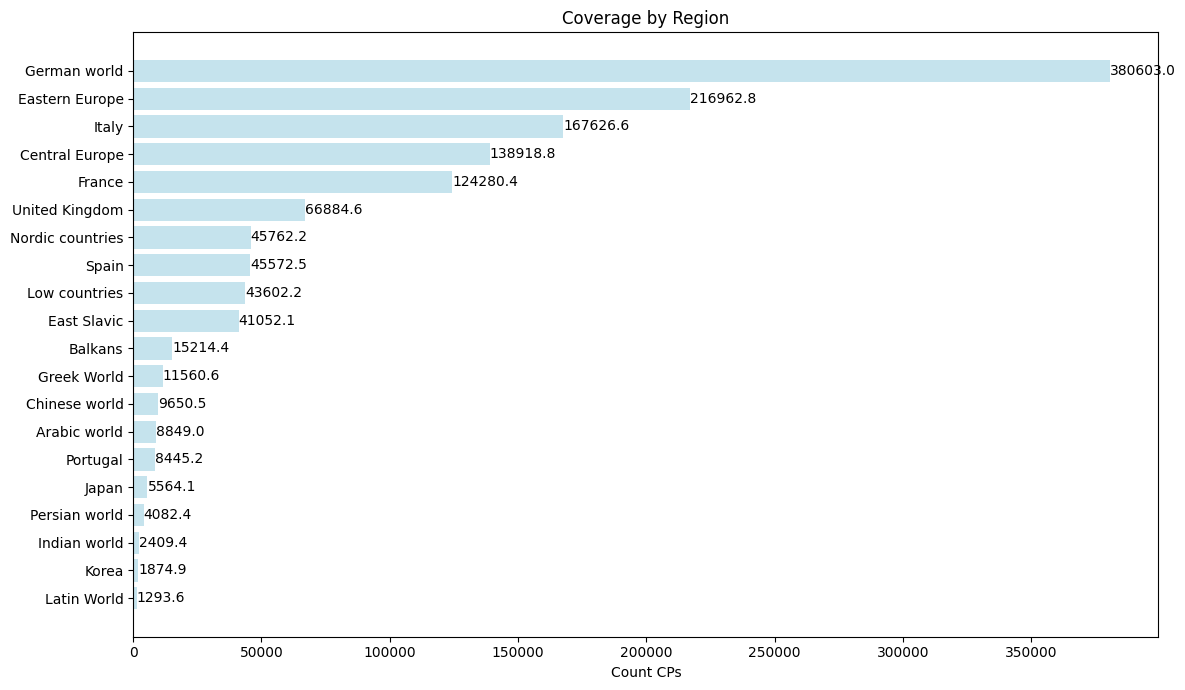

In [19]:
data_group = data_sorted.groupby('region_name')['N_est'].sum().rename('Count CPs').reset_index()
data_group = data_group.sort_values('Count CPs', ascending=True)

fig, ax = plt.subplots(figsize=(12, 7))
bars = ax.barh(data_group['region_name'], data_group['Count CPs'], color='lightblue', alpha=0.7)

ax.set_xlabel('Count CPs')
ax.set_ylabel('')
ax.set_title('Coverage by Region')

# Add values at the end of each bar
for bar in bars:
    width = bar.get_width()
    label = f'{width:.1f}'
    x_pos = width + 0.05
    y_pos = bar.get_y() + bar.get_height() / 2
    ax.text(x_pos, y_pos, label, ha='left', va='center')
plt.tight_layout()
plt.show()

,N_est,lower,upper,decade,region_name,model_type,count_cps
501,40310.350080,38283.997736,42368.544793,1860,German world,base_model,2768
499,40139.345787,38409.032940,41869.585373,1840,German world,base_model,2738
500,33345.095741,31843.013331,34877.214127,1850,German world,base_model,2283
316,16365.310784,15594.495462,17153.460529,1860,France,base_model,2128
208,32552.107666,30252.655519,34932.682055,1860,Eastern Europe,base_model,1765
...,...,...,...,...,...,...,...
1164,2.490214,2.069722,2.952172,370,Chinese world,base_model,1
1167,2.526148,2.089920,2.998099,400,Chinese world,base_model,1
1169,2.783776,2.309387,3.309199,460,Chinese world,base_model,1
1170,2.850854,2.366693,3.392152,470,Chinese world,base_model,1


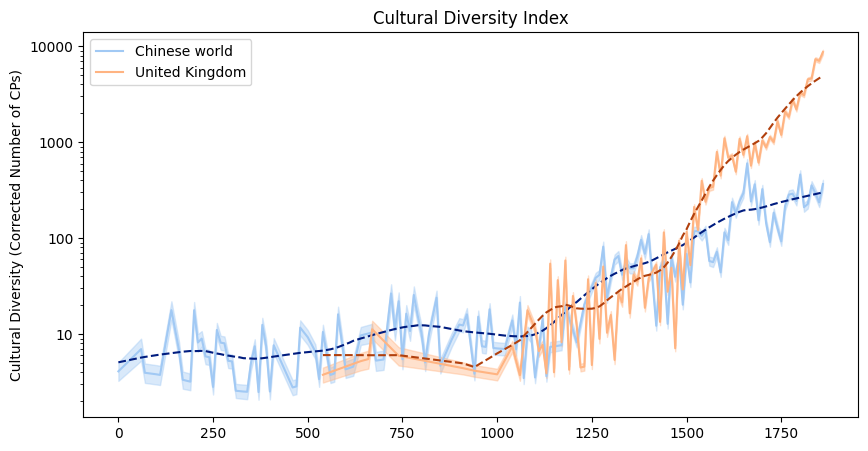

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np
from matplotlib.ticker import ScalarFormatter
data = pd.read_csv('../results/occupation/unseen_data.csv', index_col=0)

regions = ['Chinese world', 'United Kingdom']
filtered_data = data[data['region_name'].isin(regions)]
filtered_data = filtered_data[filtered_data['decade'] >= 0]

fig, ax = plt.subplots(figsize=(10, 5))

# Define the number of colors you want
num_colors = 2

# Generate a list of light colors
light_colors = sns.color_palette("pastel", num_colors)

# Generate a list of dark colors
dark_colors = sns.color_palette("dark", num_colors)

for region, light_color, dark_color in zip(regions, light_colors, dark_colors):
    data_filtered = filtered_data[filtered_data['region_name'] == region]
    ax.plot(data_filtered['decade'], data_filtered['N_est'], label=region, color=light_color)
    ax.fill_between(data_filtered['decade'], data_filtered['lower'], data_filtered['upper'], alpha=0.4, color=light_color)

    # Add lowess smooth with more volatility
    lowess = sm.nonparametric.lowess(data_filtered['N_est'], data_filtered['decade'], frac=0.2)
    ax.plot(data_filtered['decade'], lowess[:, 1], color=dark_color, linestyle='--')

ax.set_title('Cultural Diversity Index')
ax.set_xlabel('')
ax.set_ylabel('Cultural Diversity (Corrected Number of CPs)')
ax.set_yscale('log')
ax.legend()

# Set the y-axis formatter to display full integers
ax.yaxis.set_major_formatter(ScalarFormatter(useOffset=False))

plt.show()

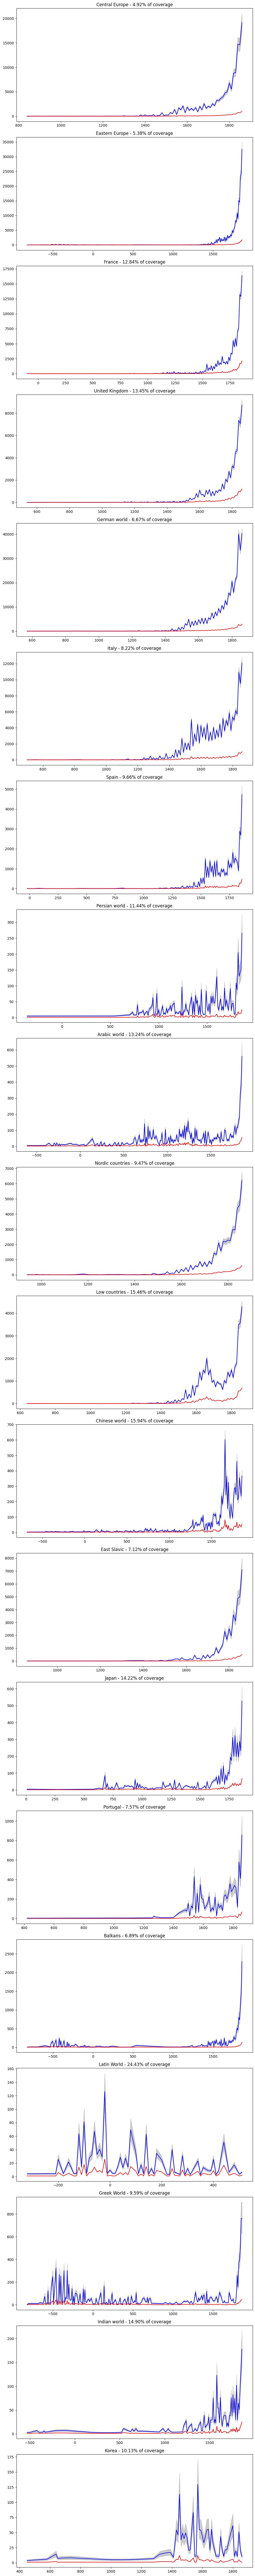

In [6]:
import pandas as pd

data = pd.read_csv('../results/occupation/unseen_data.csv', index_col=0)

fig, axs = plt.subplots(len(data['region_name'].unique()), 1, figsize=(10, 5*len(data['region_name'].unique())))

for i, region in enumerate(data['region_name'].unique()):
    data_filtered = data[data['region_name'] == region]
    coverage = data_filtered['count_cps'].sum() / data_filtered['N_est'].sum() * 100
    axs[i].plot(data_filtered['decade'], data_filtered['N_est'], color='blue')
    axs[i].plot(data_filtered['decade'], data_filtered['count_cps'], color='red')
    axs[i].fill_between(data_filtered['decade'], data_filtered['lower'], data_filtered['upper'], alpha=0.4, color='grey')
    axs[i].set_title(f"{region} - {coverage:.2f}% of coverage")
    #axs[i].set_yscale('log')

    axs[i].yaxis.set_major_formatter(ScalarFormatter(useOffset=False))

plt.tight_layout()
plt.show()

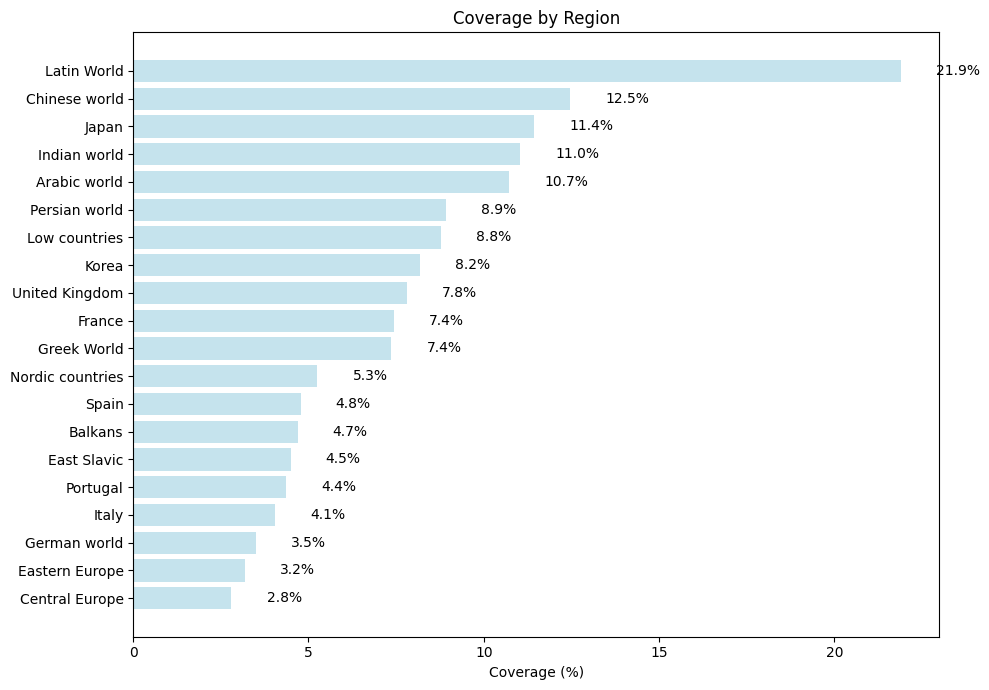

In [93]:
data_occupation = pd.read_csv('../results/occupation/unseen_data_occupation.csv', index_col=0)
data_occupation = data_occupation.drop(['occupation', 'model_type'], axis=1)
data_occupation = data_occupation.groupby(['region_name','decade']).sum().reset_index()


data_sorted = data_occupation.sort_values(by='count_cps', ascending=False)
data_group = (data_sorted.groupby('region_name')['count_cps'].sum() / data_sorted.groupby('region_name')['N_est'].sum()).rename('coverage').reset_index()
data_group = data_group.sort_values('coverage', ascending=True)

fig, ax = plt.subplots(figsize=(10, 7))
bars = ax.barh(data_group['region_name'], data_group['coverage']*100, color='lightblue', alpha=0.7)

ax.set_xlabel('Coverage (%)')
ax.set_ylabel('')
ax.set_title('Coverage by Region')

# Add values at the end of each bar
for bar in bars:
    width = bar.get_width()
    label = f'{width:.1f}%'
    x_pos = width + 1
    y_pos = bar.get_y() + bar.get_height() / 2
    ax.text(x_pos, y_pos, label, ha='left', va='center')

# Set the y-axis formatter to display full integers

plt.tight_layout()
plt.show()

In [1]:
data = data_occupation.copy()


fig, axs = plt.subplots(len(data['region_name'].unique()), 1, figsize=(10, 5*len(data['region_name'].unique())))

for i, region in enumerate(data['region_name'].unique()):
    data_filtered = data[data['region_name'] == region]
    coverage = data_filtered['count_cps'].sum() / data_filtered['N_est'].sum() * 100
    axs[i].plot(data_filtered['decade'], data_filtered['N_est'], color='blue')
    axs[i].plot(data_filtered['decade'], data_filtered['count_cps'], color='red')
    axs[i].fill_between(data_filtered['decade'], data_filtered['lower'], data_filtered['upper'], alpha=0.4, color='grey')
    axs[i].set_title(f"{region} - {coverage:.2f}% of coverage")

plt.tight_layout()
plt.show()

NameError: name 'data_occupation' is not defined

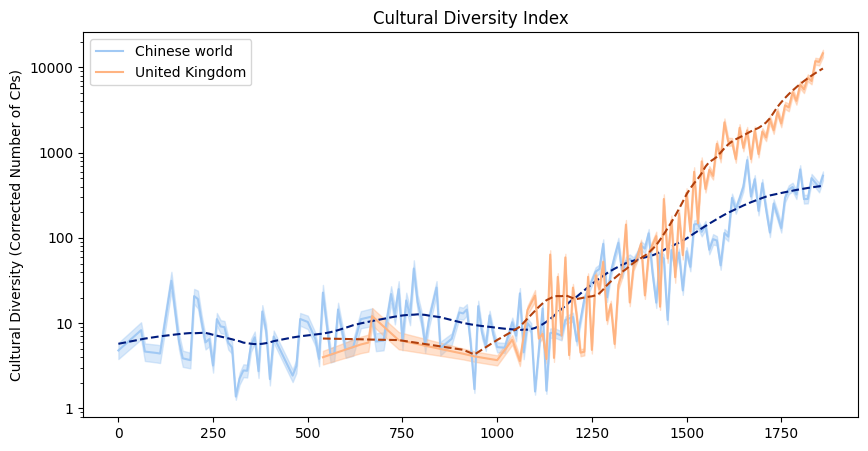

In [95]:
regions = ['Chinese world', 'United Kingdom']
filtered_data = data[data['region_name'].isin(regions)]
filtered_data = filtered_data[filtered_data['decade'] >= 0]

fig, ax = plt.subplots(figsize=(10, 5))

# Define the number of colors you want
num_colors = 2

# Generate a list of light colors
light_colors = sns.color_palette("pastel", num_colors)

# Generate a list of dark colors
dark_colors = sns.color_palette("dark", num_colors)

for region, light_color, dark_color in zip(regions, light_colors, dark_colors):
    data_filtered = filtered_data[filtered_data['region_name'] == region]
    ax.plot(data_filtered['decade'], data_filtered['N_est'], label=region, color=light_color)
    ax.fill_between(data_filtered['decade'], data_filtered['lower'], data_filtered['upper'], alpha=0.4, color=light_color)

    # Add lowess smooth with more volatility
    lowess = sm.nonparametric.lowess(data_filtered['N_est'], data_filtered['decade'], frac=0.2)
    ax.plot(data_filtered['decade'], lowess[:, 1], color=dark_color, linestyle='--')

ax.set_title('Cultural Diversity Index')
ax.set_xlabel('')
ax.set_ylabel('Cultural Diversity (Corrected Number of CPs)')
ax.set_yscale('log')
ax.legend()

# Set the y-axis formatter to display full integers
ax.yaxis.set_major_formatter(ScalarFormatter(useOffset=False))

plt.show()